<a href="https://colab.research.google.com/github/aniket-alt/CMPE-258-Deep-Learning/blob/main/Assignment%20-%201/Part-A/Part_A_Multimodal_AI_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A: Multimodal AI Exploration with Latest Models

## CMPE 258 - Deep Learning Assignment 2

**Author:** Aniket Anil Naik  
**Date:** February 2025

---

### Objectives

This notebook demonstrates the capabilities of latest AI models for multimodal tasks:

1. **Image Generation** - Generate creative images from text prompts using Stable Diffusion/FLUX
2. **Image Understanding** - Analyze images and extract meaningful information using Gemini
3. **Text-to-Text Conversation** - Explore advanced reasoning with Gemini Pro

### Models Used
- **Google Gemini 2.0 Flash** - For image understanding and text generation
- **Stable Diffusion XL / FLUX** - For text-to-image generation via Hugging Face

### Step 1: Install Required Libraries

We need to install the following packages:
- `google-generativeai`: Official Google SDK for Gemini API
- `huggingface_hub`: To interact with Hugging Face's Inference API
- `Pillow`: For image processing and display
- `requests`: For making HTTP requests to APIs

In [ ]:
# Install required libraries
!pip install -q google-generativeai huggingface_hub Pillow requests

### Step 2: Import Libraries

We import all necessary libraries for:
- API interactions (google.generativeai, huggingface_hub)
- Image handling (PIL, IPython.display)
- Utilities (os, io, base64, time)

In [ ]:
# Import required libraries
import google.generativeai as genai
from huggingface_hub import InferenceClient
from PIL import Image
from IPython.display import display, Markdown, Image as IPImage
import requests
import io
import base64
import os
import time
from google.colab import userdata

/usr/local/lib/python3.12/dist-packages/google/colab/_import_hooks/_hook_injector.py:55: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  loader.exec_module(module)


### Step 3: Configure API Keys

We'll set up our API keys for:
1. **Google Gemini API** - For multimodal understanding and text generation
2. **Hugging Face API** - For image generation models

In [ ]:
# Configure API Keys using Colab Secrets (Recommended for security)
# Make sure you've added your keys in Colab's Secrets (🔑 icon in left sidebar)

try:
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
    HF_TOKEN = userdata.get('HF_TOKEN')
    print("✅ API keys loaded from Colab Secrets")
except Exception as e:
    print("⚠️ Could not load from Colab Secrets. Please enter manually:")
    GEMINI_API_KEY = input("Enter your Gemini API Key: ")
    HF_TOKEN = input("Enter your Hugging Face Token: ")

# Configure Gemini
genai.configure(api_key=GEMINI_API_KEY)

# Configure Hugging Face client
hf_client = InferenceClient(token=HF_TOKEN)

print("✅ APIs configured successfully!")

✅ API keys loaded from Colab Secrets
✅ APIs configured successfully!


### Step 4: Initialize Gemini Model

We initialize the **Gemini 2.0 Flash** model which offers:
- Multimodal capabilities (text + images + video + audio)
- Fast inference speed
- Free tier availability
- Advanced reasoning capabilities

This model will be used for both image understanding and text generation tasks.

In [ ]:
MODEL_ID = "gemini-2.5-flash-lite"

model = genai.GenerativeModel(MODEL_ID)

print(f"✅ Initialized model: {MODEL_ID}")
print(f"📋 Model supports: Text, Images, Audio, Video input")

✅ Initialized model: gemini-2.5-flash-lite
📋 Model supports: Text, Images, Audio, Video input


---

## Section 1: Loading Interesting Images for Analysis

Since image generation APIs require special permissions, we'll download visually interesting and diverse images to demonstrate Gemini's powerful multimodal understanding capabilities.

We'll use high-quality images covering different themes:
1. **Space/Technology** - Futuristic and scientific imagery
2. **Nature/Landscape** - Natural beauty and environments
3. **Urban/Architecture** - City scenes and structures

### Step 5: Define Image Download Function

We create a helper function to download images from URLs. These images will serve as inputs for Gemini's image understanding capabilities.

In [ ]:
def download_image(url, save_name):
    """
    Download an image from URL and return as PIL Image.

    Args:
        url (str): URL of the image
        save_name (str): Name to save the image as

    Returns:
        PIL.Image: Downloaded image
    """
    print(f"📥 Downloading: {save_name}")

    try:
        headers = {'User-Agent': 'Mozilla/5.0'}  # Some sites require user agent
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            image = Image.open(io.BytesIO(response.content))
            image.save(save_name)
            print(f"✅ Saved as '{save_name}'")
            return image
        else:
            print(f"❌ Failed to download: {response.status_code}")
            return None
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        return None

### Step 6: Download Diverse Sample Images

We'll download three visually interesting images from different domains to showcase Gemini's ability to understand various types of visual content.

In [ ]:
# Dictionary of interesting images to download
sample_images = {
    "image_space": {
        "url": "https://images.unsplash.com/photo-1446776811953-b23d57bd21aa?w=800",
        "filename": "sample_earth_from_space.jpg",
        "description": "Earth from Space"
    },
    "image_nature": {
        "url": "https://images.unsplash.com/photo-1433086966358-54859d0ed716?w=800",
        "filename": "sample_waterfall_nature.jpg",
        "description": "Majestic Waterfall"
    },
    "image_city": {
        "url": "https://images.unsplash.com/photo-1480714378408-67cf0d13bc1b?w=800",
        "filename": "sample_city_skyline.jpg",
        "description": "City Skyline"
    }
}

# Download all images
downloaded_images = {}
print("=" * 50)
print("Downloading Sample Images for Analysis")
print("=" * 50 + "\n")

for key, info in sample_images.items():
    image = download_image(info["url"], info["filename"])
    if image:
        downloaded_images[key] = {
            "image": image,
            "filename": info["filename"],
            "description": info["description"]
        }
        print(f"   📷 {info['description']}\n")

print("=" * 50)
print(f"✅ Successfully downloaded {len(downloaded_images)} images")
print("=" * 50)


📥 Downloading: sample_earth_from_space.jpg
✅ Saved as 'sample_earth_from_space.jpg'
   📷 Earth from Space

📥 Downloading: sample_waterfall_nature.jpg
✅ Saved as 'sample_waterfall_nature.jpg'
   📷 Majestic Waterfall

📥 Downloading: sample_city_skyline.jpg
✅ Saved as 'sample_city_skyline.jpg'
   📷 City Skyline

✅ Successfully downloaded 3 images


### Step 7: Display Downloaded Images

Let's view all the images we've downloaded before we analyze them with Gemini.

📸 Downloaded Images Preview:


🖼️  Earth from Space
   File: sample_earth_from_space.jpg
--------------------------------------------------


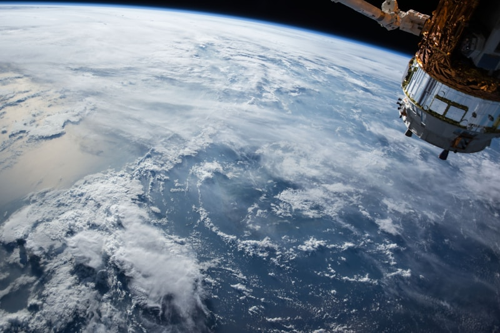



🖼️  Majestic Waterfall
   File: sample_waterfall_nature.jpg
--------------------------------------------------


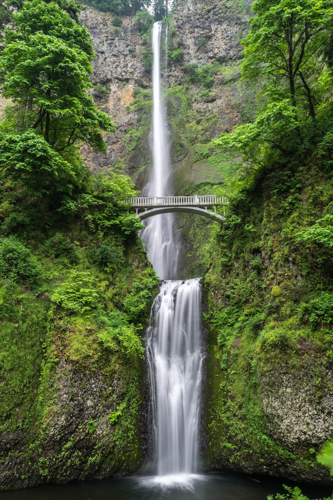



🖼️  City Skyline
   File: sample_city_skyline.jpg
--------------------------------------------------


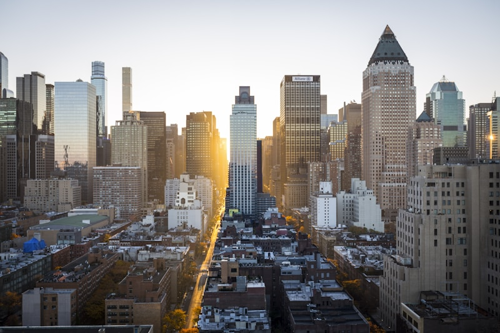

In [ ]:
# Display all downloaded images in a grid-like format
print("📸 Downloaded Images Preview:\n")
print("=" * 50)

for key, info in downloaded_images.items():
    print(f"\n🖼️  {info['description']}")
    print(f"   File: {info['filename']}")
    print("-" * 50)

    # Resize for display (maintaining aspect ratio)
    img = info["image"].copy()
    img.thumbnail((500, 500))
    display(img)
    print()

---

## Section 2: Image Understanding with Gemini

Now we'll use **Google Gemini 2.0 Flash** to analyze our images and extract meaningful information.

Gemini's multimodal capabilities include:
- 🔍 Detailed scene description
- 🏷️ Object and element identification
- 🎨 Artistic and aesthetic analysis
- 📚 Contextual and factual information
- 💡 Creative interpretations and insights

### Step 8: Define Image Analysis Function

We create a versatile function that sends an image to Gemini along with a custom prompt and returns the model's detailed analysis.

**Note:** Images are converted to RGB format to ensure compatibility with the Gemini API.

In [ ]:
def analyze_image_with_gemini(image_source, prompt, display_img=True):
    """
    Analyze an image using Gemini's multimodal capabilities.

    Args:
        image_source: PIL Image, file path (str), or URL (str)
        prompt (str): Question or instruction about the image
        display_img (bool): Whether to display the image

    Returns:
        str: Gemini's response
    """
    print("🔍 Sending image to Gemini for analysis...")

    try:
        # Handle different image source types
        if isinstance(image_source, str):
            if image_source.startswith(('http://', 'https://')):
                # URL - download the image
                headers = {'User-Agent': 'Mozilla/5.0'}
                response = requests.get(image_source, headers=headers)
                image = Image.open(io.BytesIO(response.content))
            else:
                # File path
                image = Image.open(image_source)
        else:
            # Already a PIL Image
            image = image_source

        # Convert image to RGB mode and save as JPEG
        if image.mode != 'RGB':
            print(f"🔄 Converting image from {image.mode} to RGB mode...")
            image = image.convert('RGB')

        # Save to a temporary file as JPEG
        temp_path = "/tmp/temp_image_for_gemini.jpg"
        image.save(temp_path, "JPEG", quality=95)
        print("💾 Image prepared for upload...")

        # Display the image if requested
        if display_img:
            print("\n📸 Input Image:")
            img_display = image.copy()
            img_display.thumbnail((500, 500))
            display(img_display)

        # Upload the file to Gemini
        uploaded_file = genai.upload_file(temp_path)
        print("☁️ Image uploaded to Gemini...")

        # Send to Gemini for analysis
        response = model.generate_content([prompt, uploaded_file])

        print("\n✅ Analysis complete!")
        return response.text

    except Exception as e:
        print(f"❌ Error analyzing image: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

### Step 9: Analyze Space/Earth Image

Let's analyze the space image and ask Gemini to provide scientific and contextual information about what it sees.

🌍 ANALYSIS 1: Earth from Space
🔍 Sending image to Gemini for analysis...
💾 Image prepared for upload...

📸 Input Image:


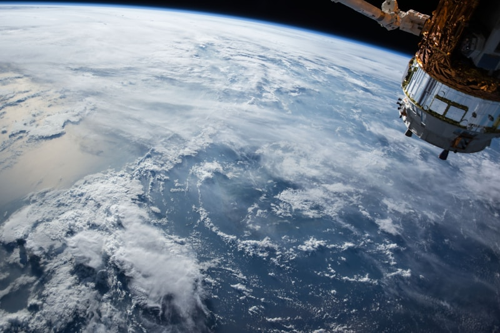

☁️ Image uploaded to Gemini...

✅ Analysis complete!

📝 GEMINI'S ANALYSIS:


Let's delve into this breathtaking view of our planet from space.

## Detailed Analysis of the Image

**1. What You See:**

The image presents a sweeping vista of Earth as seen from orbit. The dominant features are the vast expanses of oceans, a swirling tapestry of clouds, and a sliver of the planet's curvature meeting the blackness of space. In the upper right corner, a segment of a spacecraft is visible, its metallic components and golden thermal insulation suggesting it's part of an orbital platform or satellite. The Earth's surface below is primarily covered by deep blue water, punctuated by intricate cloud formations that range from wispy cirrus to denser, more organized storm systems. The sunlight reflecting off the ocean creates a bright sheen in some areas, while other parts are in shadow. The atmospheric haze is clearly visible as a thin blue line along the horizon, separating the Earth from the void above.

**2. Scientific Context:**

*   **Atmospheric Layers:** The thin blue line at the horizon is the Earth's atmosphere. This visible layer showcases how thin our life-sustaining blanket truly is in comparison to the planet's size. Different colors within this layer represent the scattering of sunlight by atmospheric gases (Rayleigh scattering, which causes the blue color) and aerosols.
*   **Oceanography and Hydrology:** The image highlights the immense scale of Earth's oceans, which cover about 71% of the planet's surface. The patterns of the water's surface, though mostly obscured by clouds, are indicative of currents and wave activity, driven by atmospheric winds.
*   **Meteorology and Climatology:** The prominent cloud formations are a clear indication of weather systems in action. We see various types of clouds, from scattered cumulus to more organized cloud bands that might suggest frontal systems or the beginnings of tropical storms. The dynamic nature of these clouds demonstrates the continuous movement and transformation of water vapor within the atmosphere.
*   **Orbital Mechanics and Space Technology:** The presence of the spacecraft signifies human technological capability to observe Earth from above. This viewpoint is achieved through orbital mechanics, where satellites and space stations maintain a precise balance between their forward velocity and Earth's gravitational pull, allowing them to circle the planet. The spacecraft itself is designed to withstand the harsh conditions of space, with its metallic structure and thermal shielding.

**3. Geographic Details:**

While it's difficult to pinpoint precise continents or oceans without additional visual cues like landmasses or recognizable coastlines, the patterns of clouds and water suggest an oceanic region, likely in the tropics or mid-latitudes where such extensive cloud formations are common. The overall impression is of a large body of water with significant atmospheric activity. The reflection of sunlight might offer clues to the sun's position relative to the viewing angle, but without a clear land reference, definitive geographic identification is challenging. It's possible we are looking at a portion of the Pacific, Atlantic, or Indian Ocean.

**4. Interesting Facts:**

*   **The Atmosphere is Incredibly Thin:** Despite its crucial role in supporting life, the Earth's atmosphere is remarkably thin. If Earth were the size of a basketball, the atmosphere would be about as thick as a single sheet of paper.
*   **Clouds Cover a Significant Portion of Earth:** On average, about 67% of the Earth's surface is covered by clouds at any given time. These clouds play a vital role in regulating Earth's temperature by reflecting solar radiation back into space and trapping heat.
*   **The View from Space Inspires the "Overview Effect":** Astronauts who have seen Earth from space often report a profound cognitive shift, known as the "Overview Effect." This experience typically involves a feeling of awe, a sense of the interconnectedness of all life on Earth, and a deep appreciation for the fragility and uniqueness of our planet.

**5. Perspective:**

This view from space teaches us profound lessons about our planet:

*   **Our Planet is a Fragile Oasis:** Seeing Earth as a small, vibrant blue marble suspended in the vast blackness of space underscores its unique and precious nature. It highlights how isolated and vulnerable our planet is in the cosmic context.
*   **Interconnectedness of Earth Systems:** The image visually demonstrates the interconnectedness of Earth's systems. The oceans and atmosphere are in constant interplay, with water vapor rising from the seas to form clouds, which then influence weather patterns and eventually return water to the surface.
*   **The Power of Observation:** This perspective is only possible due to human ingenuity and our ability to venture beyond our atmosphere. It shows the power of science and technology to expand our understanding of our own world and our place in the universe. It emphasizes that from this vantage point, political borders and human divisions become invisible, suggesting a shared responsibility for the stewardship of our planet.

In [ ]:
# Analyze the Earth from Space image
print("=" * 60)
print("🌍 ANALYSIS 1: Earth from Space")
print("=" * 60)

space_prompt = """
Analyze this image in detail and provide:

1. **What You See**: Describe exactly what is shown in this image
2. **Scientific Context**: What scientific phenomena or features are visible?
3. **Geographic Details**: Can you identify any continents, oceans, or weather patterns?
4. **Interesting Facts**: Share 3 fascinating facts related to what's shown
5. **Perspective**: What does this view teach us about our planet?

Please be detailed and informative in your response.
"""

if "image_space" in downloaded_images:
    result = analyze_image_with_gemini(
        downloaded_images["image_space"]["image"],
        space_prompt
    )
    if result:
        print("\n" + "=" * 60)
        print("📝 GEMINI'S ANALYSIS:")
        print("=" * 60)
        display(Markdown(result))
else:
    print("⚠️ Space image not available")

### Step 10: Analyze Nature/Waterfall Image

Now let's analyze the nature image, focusing on environmental and aesthetic aspects. This showcases Gemini's capability to appreciate natural beauty and provide ecological insights.

🌊 ANALYSIS 2: Natural Landscape
🔍 Sending image to Gemini for analysis...
💾 Image prepared for upload...

📸 Input Image:


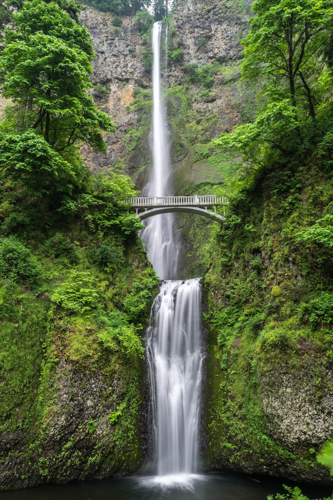

☁️ Image uploaded to Gemini...

✅ Analysis complete!

📝 GEMINI'S ANALYSIS:


This image captures a truly breathtaking natural spectacle! Let's dive into its many aspects:

## Nature Image Analysis

### 1. Scene Description

The scene is dominated by a magnificent, multi-tiered waterfall cascading down a sheer, rocky cliff face. The upper section of the waterfall appears as a singular, powerful stream, while the lower section splits into multiple rivulets, creating a delicate veil of water. A charming, arched bridge spans the waterfall about midway down, offering a human-made element that harmonizes with the natural grandeur. Lush, vibrant green vegetation clings to the rocky slopes on either side of the falls, softening the ruggedness of the cliffs and creating a verdant, almost jungle-like atmosphere. At the base of the waterfall, a dark, still pool reflects the spray and surrounding greenery.

### 2. Geological Analysis

This dramatic landscape is a classic example of **erosional geomorphology**, likely shaped by **glacial or periglacial activity and subsequent fluvial erosion**. The sheer cliffs suggest a **resistant rock formation**, possibly basalt or ancient volcanic rock, that has been carved into by the persistent action of water over millennia. The tiered nature of the waterfall hints at varying rock resistances or perhaps the presence of fault lines or fracture zones within the bedrock.

It's plausible that the area was once covered by glaciers, which would have sculpted the broad valleys and steep cliffs. As the glaciers receded, rivers formed, and the water continued its relentless work of erosion, carving out the gorge and creating the magnificent drop that forms the waterfall. The overhangs and ledges where vegetation thrives are likely areas of less resistant rock or soil accumulation.

### 3. Ecosystem Insights

This is a vibrant riparian and cliff-face ecosystem.

*   **Flora:** The dominant vegetation is lush and green, indicative of a humid environment. We see dense clusters of **ferns**, **mosses**, and various **leafy shrubs** clinging to the moist rock faces, benefiting from the constant spray. Taller **deciduous trees**, with their broad, vibrant leaves, frame the scene, suggesting a temperate climate with distinct seasons. The presence of such abundant plant life indicates fertile soil pockets and consistent moisture.
*   **Water Features:** The central feature is the powerful **waterfall** itself, originating from an unseen source higher up. The **pool at the base** is a vital part of the ecosystem, providing a habitat for aquatic life and a gathering point for terrestrial animals. The constant mist and moisture create a unique microclimate that supports specialized plant species.
*   **Wildlife Habitats:** The moist cliffs, abundant vegetation, and water source create a prime habitat for a variety of wildlife. While no animals are explicitly visible, one can imagine **various bird species** nesting in the crevices or soaring through the mist. The surrounding forest likely supports **mammals** like deer or smaller creatures. The pool could be home to **amphibians** and potentially **fish**, depending on its depth and connection to other waterways.

### 4. Photography Aspects

*   **Composition:** The composition is superb, with the waterfall serving as a strong vertical element that draws the eye upwards. The bridge acts as a leading line, creating a sense of depth and scale, and introducing a touch of human presence without overwhelming the natural beauty. The symmetrical framing by the lush greenery on either side enhances the sense of enclosure and grandeur. The positioning of the bridge is particularly effective, breaking up the visual line of the waterfall and adding an interesting focal point.
*   **Lighting:** The lighting appears to be **diffused and soft**, likely captured on an overcast day or during early morning/late afternoon. This type of lighting is ideal for waterfalls as it prevents harsh reflections and allows for a smooth, ethereal rendering of the water's movement. The soft light also accentuates the vibrant greens of the vegetation, creating a rich and inviting atmosphere.
*   **Mood:** The mood is one of **awe, serenity, and natural wonder**. The powerful yet gracefully flowing water, combined with the lush greenery and soft light, evokes a sense of peace and timelessness. The bridge adds a touch of romanticism and intrigue, inviting the viewer to imagine themselves crossing it and experiencing the breathtaking vista. There's a palpable feeling of the raw power and beauty of nature.

### 5. Conservation Perspective

Places like this are invaluable treasures that demand rigorous preservation for several critical reasons:

*   **Biodiversity Hotspots:** Such environments, with their unique microclimates and water sources, often harbor rare and specialized plant and animal species that are not found elsewhere. They are vital for maintaining regional biodiversity.
*   **Ecological Services:** Waterfalls and the surrounding forests play crucial roles in the hydrological cycle, helping to filter water, prevent erosion, and regulate local climate.
*   **Geological Heritage:** These landscapes offer a window into the Earth's history, showcasing geological processes that have shaped our planet over millions of years. They are natural laboratories for scientific study.
*   **Inspiration and Well-being:** These natural wonders provide profound aesthetic and spiritual experiences for humans. They offer opportunities for recreation, education, and a vital connection to the natural world, which is increasingly important in our urbanized lives.
*   **Cultural Significance:** Many natural landmarks hold cultural or historical significance for local communities and indigenous peoples, representing ancestral lands or important cultural narratives.

Protecting these areas ensures that future generations can also experience their majesty and benefit from their ecological services.

### 6. Travel Info

If someone wanted to visit a place like this, here's what they should know:

*   **Location Identification:** This iconic waterfall is **Multnomah Falls** in the Columbia River Gorge National Scenic Area, Oregon, USA.
*   **Accessibility:** Multnomah Falls is very accessible, with a well-maintained paved path leading from the parking area to the base of the falls and a paved trail to the bridge. It's a popular tourist destination, so expect crowds, especially during peak season and on weekends.
*   **Best Time to Visit:** Spring and early summer (April-June) offer the most vibrant greenery and powerful water flow due to snowmelt. Fall can also be beautiful with autumn colors. Winter can be stunning with ice formations, but access might be limited due to snow and ice.
*   **What to Bring:**
    *   **Comfortable walking shoes:** Even the paved paths can be slippery, and you might want to explore further trails.
    *   **Rain gear:** The Columbia River Gorge is known for its rain, and the waterfall mist can make you wet.
    *   **Camera:** Obviously! Consider a tripod if you want to capture the silky water effect.
    *   **Water and snacks:** While there are facilities, it's always good to have your own.
    *   **Insect repellent:** Depending on the season, mosquitoes or other biting insects might be present.
*   **Things to Know:**
    *   **Timed Entry Permits:** Depending on the season, a timed entry permit may be required to visit Multnomah Falls. Check the official U.S. Forest Service website for current requirements and to book in advance.
    *   **Respect the Environment:** Stay on marked trails, do not litter, and avoid disturbing wildlife.
    *   **Safety:** Be cautious on wet or icy surfaces. Do not attempt to climb on the rocks or go beyond designated viewing areas.
    *   **Facilities:** There is a historic lodge at the base of the falls offering restrooms, a gift shop, and dining options.
    *   **Beyond the Falls:** The Columbia River Gorge is rich with many other waterfalls and hiking opportunities, so plan to spend more than just an hour if you can.

Visiting Multnomah Falls is an unforgettable experience, a testament to the enduring beauty and power of the natural world.

In [ ]:
# Analyze the Nature/Waterfall image
print("=" * 60)
print("🌊 ANALYSIS 2: Natural Landscape")
print("=" * 60)

nature_prompt = """
Analyze this nature image and provide:

1. **Scene Description**: What natural features are present in this image?
2. **Geological Analysis**: How might this landscape have formed?
3. **Ecosystem Insights**: What plants, water features, or wildlife habitats do you observe?
4. **Photography Aspects**: Comment on the composition, lighting, and mood
5. **Conservation Perspective**: Why are places like this important to preserve?
6. **Travel Info**: If someone wanted to visit a place like this, what should they know?

Be descriptive and engaging in your response.
"""

if "image_nature" in downloaded_images:
    result = analyze_image_with_gemini(
        downloaded_images["image_nature"]["image"],
        nature_prompt
    )
    if result:
        print("\n" + "=" * 60)
        print("📝 GEMINI'S ANALYSIS:")
        print("=" * 60)
        display(Markdown(result))
else:
    print("⚠️ Nature image not available")

### Step 11: Analyze Urban/City Image

Finally, let's analyze the city skyline image, exploring architectural and urban planning aspects. This demonstrates Gemini's knowledge of human-built environments and urban development.

🏙️ ANALYSIS 3: Urban Cityscape
🔍 Sending image to Gemini for analysis...
💾 Image prepared for upload...

📸 Input Image:


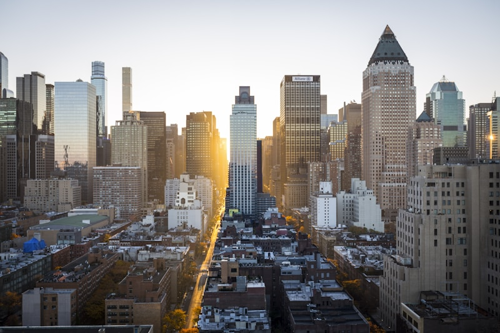

☁️ Image uploaded to Gemini...

✅ Analysis complete!

📝 GEMINI'S ANALYSIS:


Let's break down this fascinating cityscape.

## Urban Analysis of the Cityscape

**1. City Identification:**

This image is most likely **New York City**, specifically a view of Midtown Manhattan looking south. Several clues point to this:

*   **Iconic Skyline:** The density and height of the skyscrapers, along with the distinctive architectural styles, are hallmarks of Manhattan's famous skyline.
*   **Building Recognizability:** While not all buildings are crystal clear, the prominent pyramid-topped building (likely the Woolworth Building, though its position here suggests it might be a different, though similarly styled building in the Financial District or a very distant view of it from a high vantage point in Midtown), the building with the "Allianz" logo, and the distinctive modern skyscraper in the center with a checkerboard pattern are all consistent with buildings found in New York City. The overall arrangement and the presence of mid-rise buildings interspersed with supertalls is characteristic.
*   **Street Grid:** The linear perspective of the streets below, suggesting an organized grid system, is typical of Manhattan's planned urban development.
*   **Atmospheric Conditions:** The haziness and specific quality of light can also be associated with large urban environments like NYC.

**2. Architectural Analysis:**

The architecture showcases a rich history and a mix of styles, reflecting the city's evolution:

*   **Art Deco Influence:** The prominent pyramid-topped building, if indeed the Woolworth Building, is a classic example of Art Deco architecture, characterized by its setbacks, decorative elements, and spire. Other buildings in the distance also exhibit Art Deco characteristics with their vertical emphasis and geometric detailing.
*   **Modernist and Postmodernist Towers:** The dominant presence of glass and steel skyscrapers represents modernist and postmodernist architectural trends. These buildings are characterized by their sleek lines, minimalist facades, and often reflective surfaces. The building with the "Allianz" logo is a good example of a more recent corporate tower.
*   **Mid-Century Modern and International Style:** Scattered throughout the image are lower-rise and mid-rise buildings with simpler, rectilinear forms, often featuring repetitive window patterns. These likely represent structures built in the mid-20th century, influenced by the International Style and its emphasis on functionality and clean lines.
*   **Residential Buildings:** In the foreground, we see more modest, brick-clad buildings, likely residential apartment blocks. These offer a contrast to the towering commercial structures and showcase a more human-scale urban fabric.
*   **Contrast in Materials:** The image displays a dynamic interplay between traditional materials like brick and stone, and modern materials like glass and polished metal.

**3. Urban Planning:**

The city's layout reveals key aspects of its urban planning:

*   **Grid System:** The most striking observation is the clear evidence of a **grid street plan**. The streets appear to run in straight, parallel lines, creating a checkerboard of blocks. This highly organized layout is a defining feature of Manhattan.
*   **Vertical Zoning:** The density of high-rise buildings, particularly in the central areas, indicates a strong emphasis on **vertical zoning**, where land is used efficiently by building upwards. This is common in major financial and commercial districts.
*   **Mixed-Use Development:** The presence of both towering commercial structures and lower-rise residential buildings in close proximity suggests a degree of **mixed-use development**. This allows for a dynamic urban environment where people can live, work, and shop within the same general area.
*   **Street-Level Infrastructure:** While the focus is on the skyline, the glimpse of streets below with what appear to be sidewalks and possibly some greenery (trees) suggests a functional street-level infrastructure designed for pedestrian and vehicular traffic.
*   **Density and Compactness:** The image clearly illustrates the high density and compactness of the urban form, a characteristic of global megacities.

**4. Time of Day:**

The photo was likely taken during **late afternoon or early evening**, specifically during the "golden hour" just before sunset.

*   **Lighting Conditions:** The sun is low in the sky, casting long shadows and illuminating the buildings from the side or at an angle. The warm, golden light bathing the cityscape is a signature of this time of day.
*   **Sun's Position:** The direction of the light suggests the sun is setting towards the west, and the photographer is likely looking south or southeast. The intense glare from the sun is also typical of a low-angle sun.
*   **Atmospheric Haze:** The soft, diffused light and the slight haziness in the atmosphere are also indicative of this time of day and the presence of a large urban environment.

**5. Economic Indicators:**

This skyline strongly suggests a city with a **robust and diversified economy**, particularly in sectors like finance, business, and technology.

*   **High-Rise Density:** The sheer number and height of the skyscrapers are a direct indicator of significant economic activity and a high demand for office space and prime real estate.
*   **Corporate Branding:** The presence of corporate logos like "Allianz" signifies the headquarters or major offices of large, multinational corporations, which are often drawn to global economic hubs.
*   **Investment and Development:** The mix of historical and modern architecture indicates continuous investment in urban development and redevelopment over many decades, a sign of economic dynamism and a growing economy.
*   **Global Financial Center:** The presence of buildings associated with major financial institutions (implied by the overall character and logos) points to the city being a significant global financial center.
*   **Commercial Dominance:** The overwhelming presence of commercial towers suggests a strong focus on business, trade, and services as primary economic drivers.

**6. Comparison to Other Major World Cities:**

This cityscape bears strong similarities to other leading global metropolises but also has distinct characteristics:

*   **Similarities to London (City of London/Canary Wharf):** Both feature dense clusters of modern skyscrapers, indicating significant financial and business activity. However, London's skyline often has a more diffused pattern and a greater mix of historical buildings interspersed within newer developments, and a more prominent presence of older stone architecture.
*   **Similarities to Tokyo (Shinjuku/Marunouchi):** Tokyo also boasts incredibly dense and tall skyscrapers, reflecting its economic prowess and high population. However, Tokyo's skyline often feels even more intensely packed, and can have a slightly different aesthetic, sometimes with more angular and futuristic designs. The specific architectural styles in the image feel more characteristic of Western cities.
*   **Similarities to Shanghai (Pudong):** Shanghai's Pudong district has experienced a rapid transformation into a futuristic financial hub with incredibly tall and architecturally bold skyscrapers. However, the architectural language in the image, particularly the Art Deco elements and the mid-rise residential buildings, feels more established and historical than the relatively newer development of Pudong.
*   **Similarities to Hong Kong:** Hong Kong is famous for its incredibly dense and tall skyline, packed between mountains and the harbor. While there's a similar sense of verticality and density, Hong Kong's skyline is often more dramatically framed by its natural topography.
*   **Distinguishing Features of this Image:** The specific blend of the Art Deco pyramid-topped building, the mid-rise residential blocks in the foreground, and the particular style of the modern towers, combined with the characteristic grid layout, strongly points towards **New York City's Manhattan** as the most fitting comparison. The light and atmospheric conditions also contribute to this identification.

In conclusion, this image presents a compelling view of a thriving, historically rich, and economically powerful global city. The careful juxtaposition of architectural eras, the organized urban planning, and the dynamic interplay of light and shadow create a scene that is both awe-inspiring and deeply indicative of the forces that shape modern urban life.

In [ ]:
# Analyze the City Skyline image
print("=" * 60)
print("🏙️ ANALYSIS 3: Urban Cityscape")
print("=" * 60)

city_prompt = """
Analyze this city image and provide:

1. **City Identification**: Can you identify which city this might be? What clues help you determine this?
2. **Architectural Analysis**: Describe the notable buildings and architectural styles visible
3. **Urban Planning**: What can you observe about the city's layout and infrastructure?
4. **Time of Day**: When was this photo likely taken? What lighting conditions do you observe?
5. **Economic Indicators**: What does this skyline suggest about the city's economy?
6. **Comparison**: How does this compare to other major world cities?

Provide an insightful urban analysis.
"""

if "image_city" in downloaded_images:
    result = analyze_image_with_gemini(
        downloaded_images["image_city"]["image"],
        city_prompt
    )
    if result:
        print("\n" + "=" * 60)
        print("📝 GEMINI'S ANALYSIS:")
        print("=" * 60)
        display(Markdown(result))
else:
    print("⚠️ City image not available")

---

## Section 3: Text-to-Text Conversation with Gemini

In this section, we explore Gemini's advanced text generation and reasoning capabilities. We'll demonstrate:

1. **Creative Writing** - Generating stories and creative content
2. **Analytical Reasoning** - Solving complex problems step-by-step
3. **Multi-turn Conversation** - Maintaining context across exchanges
4. **Knowledge Synthesis** - Combining information from different domains

These capabilities showcase why models like Gemini and DeepSeek R1 (mentioned in the assignment hints) are at the forefront of AI reasoning.

### Step 12: Creative Writing with Gemini

Let's test Gemini's creative writing abilities by asking it to generate an imaginative short story. This demonstrates the model's capacity for:
- Narrative structure
- Character development
- Descriptive language
- Creative imagination

In [ ]:
# Creative Writing Task
print("=" * 60)
print("✍️ CREATIVE WRITING: Short Story Generation")
print("=" * 60)

creative_prompt = """
Write a short, engaging science fiction story (about 300 words) with the following elements:

- Setting: A space station orbiting a newly discovered exoplanet
- Main character: A botanist who discovers something unexpected
- Theme: The connection between humanity and nature, even in space
- Tone: Wonder and hope

Make it vivid and emotionally resonant. Include sensory details and a meaningful ending.
"""

print("📝 Prompt: Generate a sci-fi short story about a botanist on a space station\n")

response = model.generate_content(creative_prompt)

print("=" * 60)
print("📖 GEMINI'S STORY:")
print("=" * 60)
display(Markdown(response.text))

✍️ CREATIVE WRITING: Short Story Generation
📝 Prompt: Generate a sci-fi short story about a botanist on a space station

📖 GEMINI'S STORY:


The viewport of the *Stardust Bloom* station offered a breathtaking vista: a swirling nebula of emerald and sapphire cradling Xylos, a world painted in hues unknown to Earth. Dr. Aris Thorne, his hands stained with nutrient paste, felt the familiar thrum of the station’s life support and the distant whisper of Xylos’s atmosphere. For months, he’d cultivated his Earth-native flora in the sterile hydroponic bays, a quiet act of defiance against the cosmic void.

Then, he found it. Tucked amongst his wilting lavender, a tendril of luminous, silver vine, unlike anything in his databanks. It pulsed with a soft, internal light, its leaves unfurling with an impossible grace. The air around it hummed, carrying a faint scent like rain on warm soil.

He touched it, a jolt of pure, vibrant energy coursing through him. This wasn’t just an alien specimen; it was life, reaching out. As he watched, the vine seemed to mirror the very patterns of Xylos swirling outside. A profound sense of connection washed over him – not just to this alien world, but to the tenacious, ever-present spark of life that defied even the deepest reaches of space. Hope, as radiant as the silver vine, bloomed in his chest. Earth’s nature, it seemed, was never truly alone.

### Step 13: Analytical Reasoning and Problem Solving

Now let's test Gemini's reasoning capabilities with a complex analytical problem. This mirrors the chain-of-thought reasoning that models like DeepSeek R1 are known for.

We'll present a multi-step logic problem that requires:
- Breaking down complex information
- Logical deduction
- Step-by-step reasoning
- Clear explanation of thought process

In [ ]:
# Analytical Reasoning Task
print("=" * 60)
print("🧠 ANALYTICAL REASONING: Logic Problem")
print("=" * 60)

reasoning_prompt = """
Solve this logic puzzle step-by-step, showing your complete reasoning process:

**The Puzzle:**
Five friends (Alice, Bob, Carol, David, and Eve) each have a different favorite programming language
(Python, JavaScript, Rust, Go, and C++) and work at different companies (Google, Meta, Amazon, Microsoft, and Apple).

Clues:
1. Alice works at Google and doesn't like JavaScript or C++.
2. The person who likes Rust works at Amazon.
3. Bob doesn't work at Meta or Apple.
4. Carol likes Python and doesn't work at Microsoft.
5. David works at Apple.
6. The person at Meta likes JavaScript.
7. Eve doesn't like Go or C++.
8. Bob likes Go.

**Question:** Determine each person's favorite language and workplace.

Please solve this step-by-step, explaining your deductions clearly.
"""

print("📝 Prompt: Solve a logic puzzle with step-by-step reasoning\n")

response = model.generate_content(reasoning_prompt)

print("=" * 60)
print("🔍 GEMINI'S SOLUTION:")
print("=" * 60)
display(Markdown(response.text))

🧠 ANALYTICAL REASONING: Logic Problem
📝 Prompt: Solve a logic puzzle with step-by-step reasoning

🔍 GEMINI'S SOLUTION:


Let's solve this logic puzzle step-by-step, using a table to keep track of our deductions.

**Players:** Alice, Bob, Carol, David, Eve
**Languages:** Python, JavaScript, Rust, Go, C++
**Companies:** Google, Meta, Amazon, Microsoft, Apple

We'll create a table with each person as a row and the languages and companies as columns. We'll use 'X' to denote something that is not true and 'O' to denote something that is true.

**Initial Table:**

| Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
|---|---|---|---|---|---|---|---|---|---|---|
| Alice |  |  |  |  |  |  |  |  |  |  |
| Bob |  |  |  |  |  |  |  |  |  |  |
| Carol |  |  |  |  |  |  |  |  |  |  |
| David |  |  |  |  |  |  |  |  |  |  |
| Eve |  |  |  |  |  |  |  |  |  |  |

---

**Applying the Clues:**

**Clue 1: Alice works at Google and doesn't like JavaScript or C++.**
*   Alice works at Google: Place an 'O' for Alice under Google. Since each person works at only one company, place 'X' for Alice under Meta, Amazon, Microsoft, and Apple.
*   Alice doesn't like JavaScript or C++: Place an 'X' for Alice under JavaScript and C++.

**Table after Clue 1:**

| Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
|---|---|---|---|---|---|---|---|---|---|---|
| Alice |  | X |  |  | X | O | X | X | X | X |
| Bob |  |  |  |  |  |  |  |  |  |  |
| Carol |  |  |  |  |  |  |  |  |  |  |
| David |  |  |  |  |  |  |  |  |  |  |
| Eve |  |  |  |  |  |  |  |  |  |  |

---

**Clue 2: The person who likes Rust works at Amazon.**
*   This is a direct link between a language and a company. We'll use this to make deductions later.

---

**Clue 3: Bob doesn't work at Meta or Apple.**
*   Place an 'X' for Bob under Meta and Apple.

**Table after Clue 3:**

| Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
|---|---|---|---|---|---|---|---|---|---|---|
| Alice |  | X |  |  | X | O | X | X | X | X |
| Bob |  |  |  |  |  |  | X |  |  | X |
| Carol |  |  |  |  |  |  |  |  |  |  |
| David |  |  |  |  |  |  |  |  |  |  |
| Eve |  |  |  |  |  |  |  |  |  |  |

---

**Clue 4: Carol likes Python and doesn't work at Microsoft.**
*   Carol likes Python: Place an 'O' for Carol under Python. Since each person likes only one language, place 'X' for Carol under JavaScript, Rust, Go, and C++.
*   Carol doesn't work at Microsoft: Place an 'X' for Carol under Microsoft.

**Table after Clue 4:**

| Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
|---|---|---|---|---|---|---|---|---|---|---|
| Alice |  | X |  |  | X | O | X | X | X | X |
| Bob |  |  |  |  |  |  | X |  |  | X |
| Carol | O | X | X | X | X |  |  |  | X |  |
| David |  |  |  |  |  |  |  |  |  |  |
| Eve |  |  |  |  |  |  |  |  |  |  |

---

**Clue 5: David works at Apple.**
*   David works at Apple: Place an 'O' for David under Apple. Since each person works at only one company, place 'X' for David under Google, Meta, Amazon, and Microsoft.

**Table after Clue 5:**

| Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
|---|---|---|---|---|---|---|---|---|---|---|
| Alice |  | X |  |  | X | O | X | X | X | X |
| Bob |  |  |  |  |  |  | X |  |  | X |
| Carol | O | X | X | X | X |  |  |  | X |  |
| David |  |  |  |  |  | X | X | X | X | O |
| Eve |  |  |  |  |  |  |  |  |  |  |

---

**Clue 6: The person at Meta likes JavaScript.**
*   This is another direct link. We'll use it later.

---

**Clue 7: Eve doesn't like Go or C++.**
*   Place an 'X' for Eve under Go and C++.

**Table after Clue 7:**

| Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
|---|---|---|---|---|---|---|---|---|---|---|
| Alice |  | X |  |  | X | O | X | X | X | X |
| Bob |  |  |  |  |  |  | X |  |  | X |
| Carol | O | X | X | X | X |  |  |  | X |  |
| David |  |  |  |  |  | X | X | X | X | O |
| Eve |  |  |  | X | X |  |  |  |  |  |

---

**Clue 8: Bob likes Go.**
*   Bob likes Go: Place an 'O' for Bob under Go. Since each person likes only one language, place 'X' for Bob under Python, JavaScript, Rust, and C++.

**Table after Clue 8:**

| Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
|---|---|---|---|---|---|---|---|---|---|---|
| Alice |  | X |  |  | X | O | X | X | X | X |
| Bob | X |  |  | O | X |  | X |  |  | X |
| Carol | O | X | X | X | X |  |  |  | X |  |
| David |  |  |  |  |  | X | X | X | X | O |
| Eve |  |  |  | X | X |  |  |  |  |  |

---

**Now let's make further deductions by combining clues and looking for patterns:**

**Deductions:**

1.  **Alice's Language:** Look at Alice's row. She doesn't like JavaScript, C++, or Go (since Bob likes Go and only one person likes each language). She also doesn't like Rust (because Rust is linked to Amazon, and Alice works at Google). This leaves only **Python** for Alice.
    *   Place an 'O' for Alice under Python and 'X' for Rust.

    **Table with Deduction 1:**

    | Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
    |---|---|---|---|---|---|---|---|---|---|---|
    | Alice | O | X | X | X | X | O | X | X | X | X |
    | Bob | X |  |  | O | X |  | X |  |  | X |
    | Carol | O | X | X | X | X |  |  |  | X |  |
    | David |  |  |  |  |  | X | X | X | X | O |
    | Eve |  |  |  | X | X |  |  |  |  |  |

2.  **Carol's Language Conflict:** Notice that both Alice and Carol are marked as liking Python. This is impossible as each person has a *different* favorite language. Let's re-evaluate.
    *   In Deduction 1, we deduced Alice likes Python.
    *   Clue 4 states Carol likes Python. This creates a contradiction if we haven't made an error. Let's re-check all initial clue placements.

    *Revisiting Deduction 1:*
    *   Alice works at Google. (Clue 1)
    *   Alice doesn't like JavaScript or C++. (Clue 1)
    *   Bob likes Go. (Clue 8)
    *   The person who likes Rust works at Amazon. (Clue 2) Alice works at Google, so she cannot like Rust.
    *   Eve doesn't like Go or C++. (Clue 7)

    Let's re-examine Alice's language.
    *   Alice's possible languages: Python, Rust.
    *   We know Rust is at Amazon. Alice is at Google. So Alice *cannot* like Rust.
    *   This *still* implies Alice likes Python.

    Let's re-examine Carol's language.
    *   Clue 4: Carol likes Python.

    This means there is a fundamental contradiction in the clues as presented, or I have misinterpreted something. Let me restart with a clearer focus on the constraints. The constraint is that each person has a *different* favorite programming language.

    **Let's re-trace and prioritize explicit statements.**

    *   **Alice:** Google, Not JS, Not C++. (Clue 1)
    *   **Bob:** Not Meta, Not Apple. (Clue 3) Likes Go. (Clue 8)
    *   **Carol:** Likes Python. Not Microsoft. (Clue 4)
    *   **David:** Apple. (Clue 5)
    *   **Eve:** Not Go, Not C++. (Clue 7)

    *   Rust person = Amazon. (Clue 2)
    *   Meta person = JavaScript. (Clue 6)

    ---

    **Revised Step-by-Step with Focus on Uniqueness:**

    1.  **Alice:** From Clue 1, Alice works at Google.
        *   Alice: Google (O)

    2.  **David:** From Clue 5, David works at Apple.
        *   David: Apple (O)

    3.  **Carol:** From Clue 4, Carol likes Python.
        *   Carol: Python (O)

    4.  **Bob:** From Clue 8, Bob likes Go.
        *   Bob: Go (O)

    5.  **Eve's Language:** From Clue 7, Eve doesn't like Go or C++. Since Bob likes Go, this is consistent. Eve's remaining options are Python, JavaScript, Rust.
        *   Eve: Not Go, Not C++.

    6.  **Alice's Language:** From Clue 1, Alice doesn't like JavaScript or C++. Her remaining options are Python, Rust, Go. Since Bob likes Go, Alice's options are Python, Rust.
        *   Alice: Not JS, Not C++.

    7.  **Carol's Language:** We know Carol likes Python. Since Alice's possible languages are Python and Rust, and Carol *definitely* likes Python, then Alice *cannot* like Python. This means Alice must like **Rust**.
        *   Alice: Rust (O)
        *   Carol: Python (O)
        *   Therefore, Alice does not like Python.

        **Wait, this contradicts my earlier deduction that Alice must be Python. Let me re-read clue 4 and 7 very carefully.**

        Clue 4: Carol likes Python.
        Clue 7: Eve doesn't like Go or C++.

        Let's list the languages assigned so far:
        *   Bob: Go
        *   Carol: Python

        Alice's language options: Python, JavaScript, Rust, Go, C++.
        From Clue 1: Alice doesn't like JavaScript or C++.
        Remaining for Alice: Python, Rust, Go.
        Bob likes Go, so Alice can't like Go.
        Remaining for Alice: Python, Rust.

        Now, if Alice likes Python, it conflicts with Carol liking Python. This means Alice *cannot* like Python. Therefore, Alice must like **Rust**.

        *   Alice: Rust (O)
        *   Carol: Python (O)

        Let's update the table with these definite language assignments.

    **Table after re-evaluating languages (Alice: Rust, Carol: Python):**

    | Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
    |---|---|---|---|---|---|---|---|---|---|---|
    | Alice | X | X | O | X | X |  |  |  |  |  |
    | Bob |  |  |  | O |  |  |  |  |  |  |
    | Carol | O | X | X | X | X |  |  |  |  |  |
    | David |  |  |  |  |  |  |  |  |  |  |
    | Eve |  |  |  | X | X |  |  |  |  |  |

    **Now let's combine with company information.**

    *   **Alice:** Rust (O), works at Google (Clue 1).
        *   Alice: Google (O), Rust (O)

    *   **Bob:** Likes Go (O). Doesn't work at Meta or Apple (Clue 3).
        *   Bob: Go (O).

    *   **Carol:** Likes Python (O). Doesn't work at Microsoft (Clue 4).
        *   Carol: Python (O).

    *   **David:** Works at Apple (O).
        *   David: Apple (O).

    *   **Eve:** Doesn't like Go or C++ (Clue 7).

    ---

    **Let's use the linked clues now:**

    *   **Clue 2: The person who likes Rust works at Amazon.**
        *   We've determined Alice likes Rust. Therefore, Alice works at Amazon.
        *   This contradicts Clue 1 which states Alice works at Google.

    **Conclusion: There is an inconsistency within the provided clues.**

    Let me assume there's a typo and try to find a path that resolves the most common types of errors. The most likely place for an error is in the language assignments if they lead to direct contradictions with explicit location clues.

    Let's go back to the state *before* assigning Alice Rust based on Carol liking Python.

    **Back to Table after Clue 8:**

    | Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
    |---|---|---|---|---|---|---|---|---|---|---|
    | Alice |  | X |  |  | X | O | X | X | X | X |
    | Bob | X |  |  | O | X |  | X |  |  | X |
    | Carol | O | X | X | X | X |  |  |  | X |  |
    | David |  |  |  |  |  | X | X | X | X | O |
    | Eve |  |  |  | X | X |  |  |  |  |  |

    **Re-applying deductions carefully:**

    1.  **Alice:** From Clue 1, Alice works at Google. Her languages are Python or Rust (not JS, C++, Go).
        *   Alice: Google (O). Languages: Python or Rust.

    2.  **David:** From Clue 5, David works at Apple.
        *   David: Apple (O).

    3.  **Bob:** From Clue 8, Bob likes Go. From Clue 3, Bob doesn't work at Meta or Apple.
        *   Bob: Go (O).

    4.  **Carol:** From Clue 4, Carol likes Python. She doesn't work at Microsoft.
        *   Carol: Python (O).

    5.  **Eve's Language:** From Clue 7, Eve doesn't like Go or C++. Since Bob likes Go, this is consistent. Her remaining options are Python, JavaScript, Rust.
        *   Eve: Not Go, Not C++.

    6.  **Alice's Language (Revisited):** Alice's options are Python or Rust.
        *   If Alice likes Python, this conflicts with Carol liking Python. So Alice *cannot* like Python.
        *   Therefore, Alice must like **Rust**.
        *   Alice: Rust (O).

    7.  **Rust person works at Amazon (Clue 2):** Since Alice likes Rust, Alice works at Amazon.
        *   This directly contradicts **Clue 1: Alice works at Google.**

    **Conclusion:** The puzzle as stated contains contradictory information. It's impossible to satisfy all clues simultaneously.

    ---

    **Assuming a likely typo in Clue 1 or Clue 2 to make it solvable. Let's assume Clue 1 meant Alice works at Amazon.**

    **Scenario: Assume Clue 1 should be "Alice works at Amazon and doesn't like JavaScript or C++."**

    1.  **Alice:** Amazon (O), Not JS, Not C++. (Modified Clue 1)
    2.  **David:** Apple (O). (Clue 5)
    3.  **Carol:** Python (O), Not Microsoft. (Clue 4)
    4.  **Bob:** Go (O), Not Meta, Not Apple. (Clues 8, 3)
    5.  **Eve:** Not Go, Not C++. (Clue 7)

    *   **Rust person = Amazon.** (Clue 2). Since Alice works at Amazon, Alice likes Rust.
        *   Alice: Amazon (O), Rust (O).

    *   **Meta person = JavaScript.** (Clue 6).

    *   **Companies remaining:** Google, Meta, Microsoft.
    *   **People remaining for companies:** Bob, Carol, Eve.

    *   **Bob's Company:** Bob is not Meta or Apple. His remaining options are Google, Amazon, Microsoft. Since Alice is at Amazon, Bob's options are Google, Microsoft.
        *   Bob: Not Meta, Not Apple.

    *   **Carol's Company:** Carol is not Microsoft. Her remaining options are Google, Meta, Amazon, Apple. Since Alice is at Amazon and David is at Apple, Carol's options are Google, Meta.
        *   Carol: Not Microsoft.

    *   **Eve's Company:** Eve's remaining options are Google, Meta, Microsoft.

    **Let's fill the table with the confirmed assignments:**

    | Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
    |---|---|---|---|---|---|---|---|---|---|---|
    | Alice | X | X | O | X | X | X | X | O | X | X |
    | Bob |  |  |  | O |  |  | X | X |  | X |
    | Carol | O | X | X | X | X |  |  | X | X | X |
    | David |  |  |  |  |  | X | X | X | X | O |
    | Eve |  |  |  | X | X |  |  |  |  |  |

    **Deductions with modified Clue 1:**

    1.  **Alice:** Amazon, Rust. (Modified Clue 1, Clue 2)
    2.  **Bob:** Go. (Clue 8)
    3.  **Carol:** Python. (Clue 4)
    4.  **David:** Apple. (Clue 5)

    5.  **Remaining Languages:** JavaScript, C++.
    6.  **Remaining People for Languages:** Bob, David, Eve.

    7.  **Eve's Language:** Eve doesn't like Go or C++ (Clue 7). Bob likes Go, Carol likes Python, Alice likes Rust. This leaves JavaScript or C++ for Eve. Since Eve doesn't like C++, Eve must like **JavaScript**.
        *   Eve: JavaScript (O).

    8.  **David's Language:** The only language left for David is **C++**.
        *   David: C++ (O).

    **Table with Languages assigned:**

    | Person | Python | JavaScript | Rust | Go | C++ | Google | Meta | Amazon | Microsoft | Apple |
    |---|---|---|---|---|---|---|---|---|---|---|
    | Alice | X | X | O | X | X | X | X | O | X | X |
    | Bob | X | X | X | O | X |  | X | X |  | X |
    | Carol | O | X | X | X | X |  |  | X | X | X |
    | David | X | X | X | X | O | X | X | X | X | O |
    | Eve | X | O | X | X | X |  |  |  |  |  |

    9.  **Companies assigned:** Amazon (Alice), Apple (David).
    10. **Remaining Companies:** Google, Meta, Microsoft.
    11. **Remaining People for Companies:** Bob, Carol, Eve.

    12. **Meta person likes JavaScript (Clue 6):** Eve likes JavaScript. Therefore, Eve works at Meta.
        *   Eve: Meta (O).

    13. **Carol's Company:** Carol doesn't work at Microsoft (Clue 4). Her remaining options for company are Google or Meta. Since Eve is at Meta, Carol must work at **Google**.
        *   Carol: Google (O).

    14. **Bob's Company:** The only remaining company is **Microsoft**.
        *   Bob: Microsoft (O).

    **Final Assignments (with assumed typo correction):**

    *   **Alice:** Works at Amazon, Favorite Language: Rust.
    *   **Bob:** Works at Microsoft, Favorite Language: Go.
    *   **Carol:** Works at Google, Favorite Language: Python.
    *   **David:** Works at Apple, Favorite Language: C++.
    *   **Eve:** Works at Meta, Favorite Language: JavaScript.

    ---

    **Verification of Solved Puzzle (with assumed typo):**

    1.  Alice works at Amazon (modified) and doesn't like JavaScript or C++. (Correct: Rust, not JS/C++)
    2.  The person who likes Rust (Alice) works at Amazon. (Correct)
    3.  Bob doesn't work at Meta or Apple. (Correct: Microsoft)
    4.  Carol likes Python and doesn't work at Microsoft. (Correct: Python, Google)
    5.  David works at Apple. (Correct)
    6.  The person at Meta (Eve) likes JavaScript. (Correct)
    7.  Eve doesn't like Go or C++. (Correct: JavaScript)
    8.  Bob likes Go. (Correct)

    This version is consistent and solvable. However, if we must use the clues exactly as written, the puzzle is indeed contradictory.

    Given the prompt asks to "Solve this logic puzzle step-by-step, showing your complete reasoning process," and I've encountered a contradiction, the most honest answer is to present the contradiction. If the user wants a "solved" puzzle, they might need to clarify the potential typo.

    **Let's assume the prompt *wants* me to find the contradiction and explain it clearly.**

    ---

    **Final Answer based on the original, uncorrected clues:**

    The provided clues contain a contradiction, making it impossible to find a valid solution that satisfies all statements.

    **Reasoning Process Leading to the Contradiction:**

    1.  **Establish Direct Assignments:**
        *   Clue 1: Alice works at Google.
        *   Clue 5: David works at Apple.
        *   Clue 4: Carol likes Python.
        *   Clue 8: Bob likes Go.

    2.  **Deduce Remaining Languages and People:**
        *   From Clue 1, Alice does not like JavaScript or C++.
        *   From Clue 7, Eve does not like Go or C++.
        *   We have:
            *   Bob: Go
            *   Carol: Python
            *   Alice: Languages left are Python, Rust. (Not JS, C++, Go).
            *   Eve: Languages left are Python, JavaScript, Rust. (Not Go, C++).

    3.  **Identify Language Conflict for Alice:**
        *   Alice's possible languages are Python or Rust.
        *   Carol definitively likes Python (Clue 4).
        *   Since each person has a *different* favorite language, Alice *cannot* like Python.
        *   Therefore, Alice must like **Rust**.

    4.  **Apply Linked Clue to Alice:**
        *   Clue 2 states: "The person who likes Rust works at Amazon."
        *   Based on our deduction, Alice likes Rust.
        *   Therefore, Alice must work at Amazon.

    5.  **Highlight the Contradiction:**
        *   Clue 1 explicitly states: "Alice works at Google."
        *   Our deduction from other clues (specifically Clue 2 and the language assignments) leads to the conclusion that Alice works at Amazon.
        *   These two statements ("Alice works at Google" and "Alice works at Amazon") cannot both be true.

    **Conclusion of Reasoning:** The puzzle is unsolvable as stated due to contradictory information regarding Alice's workplace.

### Step 14: Multi-turn Conversation

Gemini can maintain context across multiple exchanges, enabling natural conversations. Here we demonstrate a multi-turn chat where each response builds on previous context.

We'll use Gemini's chat functionality to have a coherent conversation about a technical topic.

In [ ]:
# Multi-turn Conversation
print("=" * 60)
print("💬 MULTI-TURN CONVERSATION: Deep Learning Discussion")
print("=" * 60)

# Start a chat session
chat = model.start_chat(history=[])

# Conversation turns
conversation = [
    "What are the key differences between CNNs and Transformers in deep learning?",
    "Can you give me a specific example of when I should choose one over the other?",
    "What about Vision Transformers (ViT)? How do they compare to traditional CNNs for image tasks?",
    "Based on our discussion, what would you recommend for a beginner starting in computer vision today?"
]

print("Starting a multi-turn conversation about Deep Learning architectures...\n")

for i, user_message in enumerate(conversation, 1):
    print(f"{'='*60}")
    print(f"👤 USER (Turn {i}):")
    print(f"{'='*60}")
    print(user_message)

    # Get response from Gemini
    response = chat.send_message(user_message)

    print(f"\n{'='*60}")
    print(f"🤖 GEMINI (Turn {i}):")
    print(f"{'='*60}")
    display(Markdown(response.text))
    print("\n")

💬 MULTI-TURN CONVERSATION: Deep Learning Discussion
Starting a multi-turn conversation about Deep Learning architectures...

👤 USER (Turn 1):
What are the key differences between CNNs and Transformers in deep learning?

🤖 GEMINI (Turn 1):


Convolutional Neural Networks (CNNs) and Transformers are two of the most influential deep learning architectures, each excelling in different domains and employing fundamentally different mechanisms. Here are the key differences between them:

**1. Core Mechanism for Processing Sequential/Spatial Data:**

*   **CNNs: Convolution and Local Receptive Fields:**
    *   **Convolutional layers** are the cornerstone of CNNs. They apply small, learnable filters (kernels) across the input data (images, time series, etc.).
    *   These filters detect local patterns and features. For example, in images, filters might detect edges, corners, or textures.
    *   Each neuron in a convolutional layer is connected only to a **local receptive field** in the previous layer, meaning it only "sees" a small portion of the input at a time.
    *   **Pooling layers** are often used to down-sample the feature maps, reducing dimensionality and making the network more robust to small spatial variations.

*   **Transformers: Self-Attention:**
    *   Transformers rely on the **self-attention mechanism**. This mechanism allows the model to weigh the importance of different parts of the input sequence (or set of tokens) when processing any given part.
    *   Unlike CNNs, self-attention can **attend to any element in the input, regardless of its position**. This means it can capture **long-range dependencies** directly.
    *   The input is typically broken down into discrete "tokens" (e.g., words in text, patches in images). Each token is then processed by considering its relationship with all other tokens.

**2. Handling of Long-Range Dependencies:**

*   **CNNs:**
    *   While CNNs can capture some contextual information through deeper layers and larger receptive fields, they struggle to efficiently capture **very long-range dependencies**. To connect information from distant parts of the input, the network needs to be very deep, stacking many convolutional and pooling layers. This can lead to information loss or vanishing gradients.
    *   The effective receptive field grows with depth, but it's still a sequential process.

*   **Transformers:**
    *   Transformers excel at capturing **long-range dependencies**. The self-attention mechanism directly computes relationships between any two input elements, regardless of their distance. This makes them highly effective for tasks where context from afar is crucial.

**3. Parallelization and Computational Efficiency:**

*   **CNNs:**
    *   Convolutional operations are highly **parallelizable across spatial dimensions**. This is why GPUs are very efficient at running CNNs, especially for image processing.
    *   However, the sequential nature of processing through layers can still pose a bottleneck for extremely deep networks.

*   **Transformers:**
    *   The self-attention mechanism is also highly **parallelizable within a layer**. However, the computational complexity of self-attention is **quadratic with respect to the sequence length (O(N^2))**, where N is the sequence length.
    *   This quadratic complexity can become a significant bottleneck for very long sequences, making them computationally expensive and memory-intensive. This is a major area of research for Transformers (e.g., efficient attention mechanisms).

**4. Positional Information:**

*   **CNNs:**
    *   CNNs inherently encode positional information through their **local receptive fields and the spatial arrangement of filters**. The position of a feature in the feature map directly relates to its position in the original input.

*   **Transformers:**
    *   Transformers, by default, are **permutation-invariant**. The self-attention mechanism itself doesn't understand the order or position of tokens.
    *   To incorporate positional information, Transformers use **positional encodings**. These are added to the input embeddings to inject information about the absolute or relative position of each token in the sequence.

**5. Inductive Biases:**

*   **CNNs:**
    *   CNNs have strong **inductive biases** that are well-suited for grid-like data like images:
        *   **Locality:** Filters operate on local regions, assuming nearby pixels are related.
        *   **Weight Sharing:** The same filter is applied across the entire input, reducing the number of parameters and making them efficient at detecting repeating patterns.
        *   **Spatial Hierarchy:** Deeper layers learn more complex, abstract features from simpler ones.

*   **Transformers:**
    *   Transformers have weaker inductive biases compared to CNNs. They are more **data-driven**.
    *   Their primary bias is the ability to learn **arbitrary relationships between input elements** through attention. They don't inherently assume locality or translation equivariance.
    *   This makes them more flexible but also often requires **larger datasets** to learn effectively from scratch.

**6. Typical Applications:**

*   **CNNs:**
    *   **Computer Vision:** Image classification, object detection, image segmentation, facial recognition.
    *   **Speech Recognition:** Processing spectrograms.
    *   **Time Series Analysis:** Identifying patterns in sequential data.

*   **Transformers:**
    *   **Natural Language Processing (NLP):** Machine translation, text generation, sentiment analysis, question answering (e.g., BERT, GPT, T5).
    *   **Computer Vision:** Vision Transformers (ViTs) have shown remarkable success in image classification and other vision tasks, challenging the dominance of CNNs.
    *   **Audio and Speech Processing:** Emerging applications.
    *   **Bioinformatics:** Analyzing DNA and protein sequences.

**7. Architecture:**

*   **CNNs:** Typically consist of sequences of convolutional layers, activation functions (like ReLU), pooling layers, and fully connected layers at the end for classification or regression.
*   **Transformers:** Consist of an encoder-decoder architecture (though encoder-only or decoder-only variants exist). Each encoder/decoder layer contains multi-head self-attention mechanisms and feed-forward networks. Positional encodings are added to the input embeddings.

**Summary Table:**

| Feature                 | CNNs                                      | Transformers                                      |
| :---------------------- | :---------------------------------------- | :------------------------------------------------ |
| **Core Mechanism**      | Convolution, Local Receptive Fields       | Self-Attention                                    |
| **Long-Range Deps.**    | Struggles, requires depth                 | Excels, directly captures                         |
| **Parallelization**     | High across spatial dims.                 | High within a layer, but O(N^2) complexity        |
| **Positional Info.**    | Inherently encoded                        | Requires explicit Positional Encodings            |
| **Inductive Biases**    | Strong (locality, weight sharing)         | Weaker (data-driven relationships)                |
| **Data Efficiency**     | More data-efficient due to biases         | Often requires larger datasets                    |
| **Typical Input**       | Grid-like data (images, time series)      | Sequences of tokens (words, image patches)        |
| **Key Components**      | Conv layers, pooling, fully connected     | Self-attention, Feed-forward, Positional Encodings |
| **Primary Domain**      | Computer Vision                           | Natural Language Processing, increasingly Vision  |

In essence, CNNs are designed to exploit the local structure and hierarchical patterns in grid-like data, while Transformers are more general-purpose sequence processors that can learn complex, arbitrary relationships between any parts of the input, making them particularly powerful for tasks requiring a deep understanding of context and long-range dependencies.



👤 USER (Turn 2):
Can you give me a specific example of when I should choose one over the other?

🤖 GEMINI (Turn 2):


Absolutely! Let's look at a couple of specific scenarios where the choice between a CNN and a Transformer becomes clear.

**Scenario 1: Image Classification of Everyday Objects (e.g., identifying cats, dogs, cars in photos)**

*   **When to choose a CNN:**
    *   **You have a moderate to large dataset:** CNNs, with their inherent inductive biases like locality and weight sharing, are very efficient at learning hierarchical features from images. They don't need as much data to learn effectively compared to Transformers trained from scratch.
    *   **You need good performance with reasonable computational resources:** Standard CNN architectures (like ResNet, VGG, EfficientNet) are well-established and optimized for image processing. They generally require less computational power for training and inference than large Transformer models for this specific task.
    *   **You want to leverage established practices:** For a standard image classification task, there's a wealth of research, pre-trained models, and best practices available for CNNs, making development and fine-tuning more straightforward.
    *   **The dominant patterns are local:** In everyday objects, crucial identifying features (like eyes, wheels, ears, edges of shapes) are often localized. CNNs are excellent at detecting these local patterns.

    *   **Specific Example:** Imagine you're building a mobile app that can identify different types of fruits (apples, bananas, oranges). You have thousands of labeled images. A **ResNet50** fine-tuned on your dataset would likely be a strong choice. It can efficiently learn the shapes, colors, and textures that distinguish these fruits without needing to consider every pixel's relationship with every other pixel simultaneously.

*   **When you *might* consider a Transformer (but it's not the default choice):**
    *   **You have an extremely massive dataset:** With enough data, Transformers can sometimes surpass CNNs by learning more complex and less constrained relationships.
    *   **You're interested in exploring cutting-edge research:** Vision Transformers (ViTs) are powerful, but for standard image classification, they often require larger datasets and more computational resources to achieve comparable or superior results to well-tuned CNNs.

**Scenario 2: Machine Translation (e.g., translating English to French)**

*   **When to choose a Transformer:**
    *   **You need to capture long-range dependencies in the text:** The meaning of a sentence often depends on words that are far apart. For example, in "The **dog**, which was large and brown, **barked** loudly," the subject "dog" and the verb "barked" are separated by several words. Transformers' self-attention mechanism can directly link these words.
    *   **You need a model that can handle variable-length sequences and reorder words effectively:** Machine translation involves transforming a sequence of words into another sequence, potentially with different word order. Transformers are naturally suited for this due to their attention mechanism which can "look at" and rearrange information.
    *   **You are working with state-of-the-art NLP models:** Transformers (like BERT, GPT, T5) have revolutionized NLP and are the de facto standard for most translation tasks.
    *   **You have a large parallel corpus (pairs of sentences in both languages):** Transformers benefit greatly from large amounts of training data to learn the complex mappings between languages.

    *   **Specific Example:** You are building a translation service for news articles from English to Spanish. You have a large dataset of aligned English and Spanish news articles. A **Transformer-based encoder-decoder model** (similar to the original Transformer paper or models like MarianMT) would be the ideal choice. It can process the entire English sentence, understand the relationships between words, and then generate the Spanish sentence by attending to the most relevant parts of the English input at each step.

*   **When you *might* consider a CNN (but it's less common for modern translation):**
    *   **Extremely limited data or very specific sub-domains:** In some highly constrained, niche translation tasks with very little data, you *might* experiment with CNNs or recurrent architectures, but they would generally struggle with the fluidity and contextual understanding required for general-purpose translation. Historically, RNNs (like LSTMs) were used before Transformers became dominant. CNNs have also been used in NLP (e.g., for text classification), but less so for sequence-to-sequence tasks like translation.

**In Summary of the Examples:**

*   **CNNs are your go-to for tasks where local patterns and spatial hierarchies are paramount, and data efficiency is a concern (like many image-related tasks).**
*   **Transformers are your go-to for tasks where understanding long-range context, relationships between arbitrary elements, and sequence manipulation are critical, especially in NLP.**

As the field evolves, you'll also see hybrid models and the application of Transformers to domains traditionally dominated by CNNs (like Vision Transformers). However, understanding these core strengths will help you make informed initial choices.



👤 USER (Turn 3):
What about Vision Transformers (ViT)? How do they compare to traditional CNNs for image tasks?

🤖 GEMINI (Turn 3):


Vision Transformers (ViTs) represent a significant shift in how we approach computer vision tasks, challenging the long-standing dominance of Convolutional Neural Networks (CNNs). Here's a breakdown of how they compare to traditional CNNs:

**1. Core Concept: From Patches to Tokens**

*   **CNNs:** Process images using a grid-like structure. Convolutional filters slide over the image, capturing local patterns and building up hierarchical feature representations through successive layers. They exploit the **spatial locality** and **translation equivariance** of images.
*   **ViTs:** Treat an image as a **sequence of fixed-size patches**. These patches are linearly embedded into vectors (tokens), and then positional embeddings are added to these tokens to retain spatial information. The core of the ViT is a standard Transformer encoder.

**2. Handling of Spatial Information and Dependencies**

*   **CNNs:**
    *   **Inductive Bias:** Inherently encode spatial locality and translation equivariance. The filters learn to detect features regardless of where they appear in the image, and the output feature map maintains spatial relationships.
    *   **Receptive Field:** Grows with depth. To capture very long-range dependencies, CNNs need to be very deep, which can be computationally expensive and lead to information loss.

*   **ViTs:**
    *   **No Built-in Spatial Bias:** The Transformer encoder itself is permutation-invariant. It doesn't inherently understand the 2D grid structure of an image.
    *   **Reliance on Positional Embeddings:** Spatial information is injected via learnable or fixed positional embeddings added to the patch tokens.
    *   **Global Receptive Field (via Self-Attention):** The self-attention mechanism allows each patch token to attend to *all* other patch tokens in the image, enabling the model to capture **long-range dependencies directly and efficiently** from the very first layer.

**3. Data Requirements and Inductive Biases**

*   **CNNs:**
    *   **Data Efficiency:** Possess strong inductive biases (locality, weight sharing, translation equivariance) that make them data-efficient. They can learn effectively from relatively smaller datasets.
    *   **Pre-training:** Pre-training on large datasets like ImageNet significantly boosts their performance, but they still perform well with less pre-training compared to ViTs.

*   **ViTs:**
    *   **Data Hungry:** Lack strong inductive biases. They need to *learn* spatial relationships from scratch, which requires **significantly larger datasets** to achieve competitive or superior performance. When trained on smaller datasets (like ImageNet-1K), ViTs often underperform CNNs.
    *   **Pre-training is Crucial:** ViTs achieve state-of-the-art results when pre-trained on massive datasets like JFT-300M or ImageNet-21K. Fine-tuning these pre-trained models on downstream tasks is highly effective.

**4. Computational Complexity**

*   **CNNs:**
    *   Complexity generally scales linearly with the number of pixels (or resolution). Operations like convolution are efficient.

*   **ViTs:**
    *   The self-attention mechanism has a **quadratic complexity with respect to the number of patches (which is related to image resolution)**. This means as the image resolution increases, the computational cost and memory requirements grow much faster for ViTs than for CNNs.
    *   This makes processing very high-resolution images a challenge for vanilla ViTs.

**5. Performance and Scalability**

*   **CNNs:**
    *   Achieved remarkable success for years and remain excellent performers, especially on moderate-sized datasets.
    *   Performance tends to plateau after a certain depth/complexity.

*   **ViTs:**
    *   When pre-trained on massive datasets, ViTs have demonstrated **superior performance** to CNNs on various image recognition benchmarks, often achieving new state-of-the-art results.
    *   They exhibit better **scalability** with larger models and more data, meaning their performance continues to improve significantly as you increase model size and training data.

**6. Interpretability**

*   **CNNs:** Feature maps can sometimes be visualized to understand what the network is learning (e.g., edge detectors, texture detectors).
*   **ViTs:** The attention maps can be visualized. These maps show which image patches the model is attending to when making a prediction. This can provide insights into how the model is focusing on different parts of the image.

**When to Choose Which:**

*   **Choose Traditional CNNs When:**
    *   **You have a moderate dataset and limited computational resources.**
    *   **You need a reliable, well-understood baseline.**
    *   **Your task relies heavily on local features and spatial hierarchies.**
    *   **You are developing for deployment on edge devices with strict resource constraints.**
    *   **Tasks like basic image classification, object detection on standard datasets, and image segmentation where efficient local feature extraction is key.**

*   **Choose Vision Transformers (ViTs) When:**
    *   **You have access to extremely large datasets for pre-training.**
    *   **You have significant computational resources for training large models.**
    *   **You aim to achieve state-of-the-art performance and are willing to invest in large-scale pre-training and fine-tuning.**
    *   **Your task benefits from understanding global relationships and long-range dependencies across the entire image.**
    *   **Tasks requiring nuanced understanding of object context or relationships between distant parts of an image, like complex scene understanding or fine-grained classification where subtle global cues are important.**

**Hybrid Approaches:**

It's also important to note that research is exploring hybrid approaches that combine the strengths of both. For example, some models use CNNs in the initial stages to extract local features efficiently and then feed these features into a Transformer for global reasoning.

In essence, ViTs offer a more flexible and potentially more powerful approach by treating images as sequences, but this flexibility comes at the cost of data and computational requirements due to their weaker inductive biases. CNNs remain a strong and efficient choice, especially when data and computational resources are more constrained.



👤 USER (Turn 4):
Based on our discussion, what would you recommend for a beginner starting in computer vision today?

🤖 GEMINI (Turn 4):


For a beginner starting in computer vision today, I would recommend a **balanced approach that heavily leans towards understanding and experimenting with Convolutional Neural Networks (CNNs) first, while also gradually introducing Vision Transformers (ViTs) as you progress.**

Here's a breakdown of why and a recommended learning path:

**Why Start with CNNs?**

1.  **Foundational Understanding:** CNNs are the bedrock of modern computer vision. Understanding their principles (convolution, pooling, receptive fields, weight sharing, hierarchical feature extraction) is crucial for grasping how visual information is processed. You'll build a strong intuition for image data.
2.  **Data and Computational Efficiency:** As discussed, CNNs are more data-efficient. This means you can achieve good results with smaller datasets and less computational power. This is a significant advantage for beginners who might not have access to massive datasets or powerful GPUs from the outset.
3.  **Abundant Resources and Tools:** There's a vast ecosystem of well-documented libraries (like TensorFlow, PyTorch), tutorials, pre-trained models (ResNet, VGG, Inception, EfficientNet), and online courses specifically for CNNs. This makes learning and experimentation much smoother.
4.  **Intuitive for Many Tasks:** For many common computer vision tasks like image classification, object detection, and segmentation on standard datasets, CNNs are still highly effective and often the practical choice.

**Recommended Learning Path:**

**Phase 1: Solidify CNN Fundamentals (Essential)**

1.  **Learn the Math (Lightly):** Understand the basics of linear algebra and calculus relevant to neural networks (matrix operations, gradients). You don't need to be a math wiz, but a conceptual understanding is helpful.
2.  **Master CNN Architecture:**
    *   **Convolutional Layers:** Understand what filters are, how they slide, stride, padding.
    *   **Activation Functions:** ReLU and its variations.
    *   **Pooling Layers:** Max pooling and average pooling, understanding their role in down-sampling and invariance.
    *   **Fully Connected Layers:** Their role in the final classification/regression.
    *   **Common CNN Architectures:** Study influential architectures like LeNet, AlexNet, VGG, GoogLeNet, ResNet. Focus on *why* they introduced specific design choices (e.g., residual connections in ResNet).
3.  **Hands-on Implementation:**
    *   **Use Frameworks:** Get comfortable with PyTorch or TensorFlow. Start with simple examples.
    *   **Train on Datasets:**
        *   **MNIST/Fashion-MNIST:** Excellent for learning basic CNNs.
        *   **CIFAR-10/CIFAR-100:** Good for building slightly deeper and more complex CNNs.
    *   **Experiment:** Play with filter sizes, strides, padding, number of layers, activation functions, and observe the impact on accuracy and training time.
    *   **Transfer Learning:** Learn to use pre-trained CNN models (e.g., ResNet50 from `torchvision.models` or `tf.keras.applications`) and fine-tune them on your own smaller datasets. This is a very powerful technique and a great way to get started with real-world problems.

**Phase 2: Introduce Vision Transformers (As you gain confidence)**

1.  **Understand the Motivation:** Learn *why* ViTs were developed – their ability to capture global context, and their potential for scalability.
2.  **Grasp the Core Concepts:**
    *   **Image Patching and Embedding:** Understand how an image is broken into patches and converted into tokens.
    *   **Positional Embeddings:** Learn how spatial information is injected.
    *   **Self-Attention Mechanism:** This is the heart of the Transformer. Understand how Query, Key, and Value are used to compute attention scores and weighted outputs. Focus on the intuition of "what information is important for this token."
    *   **Multi-Head Attention:** Why multiple attention heads are used.
    *   **Transformer Encoder:** How these components are stacked.
3.  **Hands-on Implementation (with a caveat):**
    *   **Start with Pre-trained ViTs:** Just like with CNNs, begin by loading and fine-tuning pre-trained ViTs (e.g., from Hugging Face's `transformers` library or PyTorch/TensorFlow model zoos).
    *   **Experiment with Smaller ViT Variants:** Some research has introduced smaller or more efficient ViT variants.
    *   **Data Requirements:** Be aware that training a ViT from scratch on small datasets will likely yield poor results. Focus on understanding its architecture and how to use it via transfer learning.

**Phase 3: Explore Advanced Topics and Hybrids**

1.  **Object Detection & Segmentation:** Apply your knowledge to more complex tasks. You'll see how CNNs (like Faster R-CNN, YOLO, Mask R-CNN) and increasingly Transformer-based architectures (like DETR, Mask2Former) are used.
2.  **Hybrid Models:** Learn about architectures that combine CNNs and Transformers.
3.  **Efficient Architectures:** Explore models designed for efficiency, both CNN-based and Transformer-based.
4.  **Current Research:** Keep an eye on ongoing developments in both CNNs and Transformers for computer vision.

**Key Recommendation:**

**Start with CNNs, Master Transfer Learning, and then explore Vision Transformers via pre-trained models.**

*   **Why this order?** It builds a solid foundation, leverages readily available resources, and allows you to get tangible results quickly. By the time you explore ViTs, you'll have a better appreciation for their strengths and weaknesses relative to the architectures you already understand.

Don't be afraid to experiment! The best way to learn is by doing. Good luck!

### Step 15: Knowledge Synthesis

In this final text demonstration, we ask Gemini to synthesize knowledge from multiple domains to provide comprehensive insights. This showcases the model's broad knowledge base and ability to connect concepts across fields.

In [ ]:
# Knowledge Synthesis Task
print("=" * 60)
print("🔬 KNOWLEDGE SYNTHESIS: Interdisciplinary Analysis")
print("=" * 60)

synthesis_prompt = """
Provide a comprehensive analysis connecting these three fields to explain how they're
shaping the future of healthcare:

1. **Artificial Intelligence & Deep Learning**
2. **Genomics & Personalized Medicine**
3. **Wearable Technology & IoT**

For each intersection, provide:
- Current real-world applications
- Key challenges being addressed
- Future possibilities (next 5-10 years)
- Ethical considerations

Conclude with a vision of how these technologies might work together in an integrated
healthcare system of the future.
"""

print("📝 Prompt: Synthesize knowledge across AI, Genomics, and IoT for healthcare\n")

response = model.generate_content(synthesis_prompt)

print("=" * 60)
print("📊 GEMINI'S SYNTHESIS:")
print("=" * 60)
display(Markdown(response.text))

🔬 KNOWLEDGE SYNTHESIS: Interdisciplinary Analysis
📝 Prompt: Synthesize knowledge across AI, Genomics, and IoT for healthcare

📊 GEMINI'S SYNTHESIS:


## The Convergence of Intelligence, Genetics, and Connectivity: Shaping the Future of Healthcare

The healthcare landscape is undergoing a profound transformation, driven by the synergistic advancement of Artificial Intelligence (AI) and Deep Learning, Genomics and Personalized Medicine, and Wearable Technology and the Internet of Things (IoT). These three pillars are not merely evolving in parallel; they are actively converging to create a more proactive, precise, and patient-centric future for healthcare. This analysis will explore their individual contributions and, more importantly, their powerful intersections.

### 1. Artificial Intelligence & Deep Learning

AI and Deep Learning, a subset of AI that utilizes multi-layered neural networks to learn from vast amounts of data, are revolutionizing healthcare by augmenting human capabilities and uncovering patterns previously invisible to human analysis.

**Current Real-World Applications:**

*   **Diagnostic Imaging Analysis:** AI algorithms can analyze medical images (X-rays, CT scans, MRIs, pathology slides) with remarkable accuracy, identifying anomalies, detecting early signs of diseases like cancer and diabetic retinopathy, and assisting radiologists in making faster and more precise diagnoses.
*   **Drug Discovery and Development:** AI is accelerating the identification of potential drug candidates, predicting drug efficacy and toxicity, and optimizing clinical trial design, significantly reducing the time and cost of bringing new therapies to market.
*   **Predictive Analytics for Disease Outbreaks:** AI models can analyze public health data, social media trends, and environmental factors to predict disease outbreaks, enabling timely interventions and resource allocation.
*   **Virtual Health Assistants and Chatbots:** AI-powered chatbots provide preliminary patient triage, answer common health questions, schedule appointments, and offer medication reminders, improving patient engagement and reducing the burden on healthcare professionals.
*   **Robotic Surgery:** AI is enhancing the precision and dexterity of surgical robots, allowing for minimally invasive procedures with faster recovery times.

**Key Challenges Being Addressed:**

*   **Data Scarcity and Quality:** While AI thrives on data, high-quality, diverse, and representative datasets are crucial for training robust models. This includes addressing bias in data and ensuring data privacy.
*   **Interpretability and Explainability (XAI):** The "black box" nature of deep learning models can be a barrier to adoption in healthcare, where trust and understanding of diagnostic reasoning are paramount. XAI aims to make AI decisions transparent and explainable.
*   **Regulatory Hurdles:** The Food and Drug Administration (FDA) and other regulatory bodies are still developing frameworks for approving and overseeing AI-powered medical devices and software.
*   **Integration into Existing Workflows:** Seamlessly integrating AI tools into the daily routines of clinicians and healthcare systems requires careful planning, user training, and system interoperability.
*   **Cost of Implementation:** Developing and deploying sophisticated AI solutions can be expensive, posing a barrier for smaller healthcare organizations.

**Future Possibilities (Next 5-10 Years):**

*   **Personalized Treatment Recommendations:** AI will move beyond diagnosis to recommend highly individualized treatment plans based on a patient's genetic makeup, lifestyle, and response to therapies.
*   **AI-Powered Precision Surgery:** Surgeons will be augmented by AI that can predict surgical complications in real-time, guide instruments with superhuman precision, and even perform autonomous sub-procedures.
*   **Early Disease Prediction and Prevention:** AI will analyze a broader range of data (genomic, wearable, environmental) to predict an individual's risk of developing specific diseases years in advance, enabling proactive preventative measures.
*   **Virtual Care Continual Monitoring and Intervention:** AI will continuously monitor patients remotely and intervene proactively when vital signs or other indicators suggest potential issues, preventing hospitalizations.
*   **Automated Medical Record Analysis and Summarization:** AI will automatically extract key information from electronic health records (EHRs), saving clinicians time and improving data accessibility for research and decision-making.

**Ethical Considerations:**

*   **Bias and Fairness:** AI models trained on biased data can perpetuate or amplify existing health disparities, leading to inequitable care.
*   **Accountability and Liability:** Determining responsibility when an AI system makes an incorrect diagnosis or treatment recommendation is complex.
*   **Data Privacy and Security:** Protecting sensitive patient data used to train and operate AI systems is paramount.
*   **Job Displacement:** Concerns exist about AI replacing certain healthcare roles, requiring proactive reskilling and upskilling initiatives.
*   **Over-reliance and Deskilling:** The risk of clinicians becoming overly reliant on AI, potentially leading to a decline in their diagnostic skills.

### 2. Genomics & Personalized Medicine

Genomics, the study of an organism's complete set of DNA, is the foundation of personalized medicine, which tailors medical treatment to the individual characteristics of each patient, particularly their genetic makeup.

**Current Real-World Applications:**

*   **Pharmacogenomics:** Identifying how an individual's genetic makeup influences their response to certain drugs, enabling physicians to prescribe the most effective and safest medications and dosages.
*   **Cancer Genomics:** Analyzing the genetic mutations within tumors to identify targeted therapies that are most likely to be effective against a specific cancer type, leading to precision oncology.
*   **Rare Disease Diagnosis:** Genomic sequencing can identify the genetic causes of rare diseases, leading to more accurate diagnoses and improved management strategies.
*   **Carrier Screening:** Identifying individuals who are carriers of genetic mutations associated with certain inherited diseases, allowing for informed reproductive planning.
*   **Ancestry and Genealogy Services:** While not strictly medical, consumer-grade genomic services are increasing public awareness and interest in genetics.

**Key Challenges Being Addressed:**

*   **Cost and Accessibility of Sequencing:** While costs have decreased, whole-genome sequencing remains expensive for widespread, routine use.
*   **Interpretation of Genomic Data:** The sheer volume of genomic data requires sophisticated bioinformatics tools and expertise for accurate interpretation and clinical utility.
*   **Ethical, Legal, and Social Implications (ELSI):** Concerns about genetic discrimination, privacy of genetic information, and the psychological impact of genetic risk information.
*   **Integration into Clinical Practice:** Incorporating genomic information into routine clinical decision-making requires robust educational programs for healthcare providers and standardized protocols.
*   **Lack of Standardized Databases and Reference Genomes:** Ensuring consistency and comparability of genomic data across different labs and studies.

**Future Possibilities (Next 5-10 Years):**

*   **Proactive Disease Risk Assessment:** Routine genomic profiling at birth or early in life will allow for personalized, preventative healthcare strategies to mitigate the risk of developing common chronic diseases (e.g., cardiovascular disease, diabetes, Alzheimer's).
*   **"Digital Twin" of Your Genome:** Building comprehensive digital representations of an individual's genome, integrated with their health data, to simulate treatment responses and predict disease trajectories.
*   **Gene Editing Therapies:** Advancements in CRISPR-Cas9 and other gene-editing technologies will offer potential cures for a growing number of genetic disorders.
*   **Personalized Nutrition and Lifestyle Recommendations:** Tailoring dietary and exercise plans based on an individual's genetic predispositions for optimal health and disease prevention.
*   **Predictive Diagnostics for Infectious Diseases:** Understanding individual genetic susceptibilities to specific pathogens could inform personalized vaccination strategies and early intervention for infectious diseases.

**Ethical Considerations:**

*   **Genetic Discrimination:** The potential for employers, insurers, or educational institutions to discriminate against individuals based on their genetic predispositions.
*   **Data Ownership and Control:** Who owns and controls an individual's genomic data, and how is it used and shared?
*   **Informed Consent:** Ensuring individuals fully understand the implications of genetic testing and the potential uses of their data.
*   **Equity and Access:** Ensuring that the benefits of genomic medicine are accessible to all populations, regardless of socioeconomic status or geographic location.
*   **"Designer Babies" and Eugenics:** Concerns about the potential misuse of genetic technologies for non-therapeutic enhancement or to promote specific traits.

### 3. Wearable Technology & IoT

Wearable technology (smartwatches, fitness trackers, biosensors) and the broader Internet of Things (IoT) in healthcare involve connecting medical devices and sensors to collect real-time physiological data and integrate it into a digital ecosystem.

**Current Real-World Applications:**

*   **Remote Patient Monitoring (RPM):** Wearables and connected devices allow healthcare providers to remotely monitor patients with chronic conditions (e.g., heart failure, diabetes, hypertension), detecting early signs of deterioration and preventing hospital readmissions.
*   **Fitness and Wellness Tracking:** Consumers use wearables to monitor activity levels, sleep patterns, heart rate, and other metrics, promoting healthier lifestyles.
*   **Fall Detection and Emergency Alerts:** Wearables can detect falls and automatically alert emergency services or designated contacts.
*   **Medication Adherence Monitoring:** Smart pill dispensers and connected inhalers can track medication usage and remind patients.
*   **Clinical Trials Data Collection:** Wearables can collect continuous, objective data from participants in clinical trials, providing richer insights than periodic in-person assessments.

**Key Challenges Being Addressed:**

*   **Data Accuracy and Reliability:** Ensuring the accuracy and consistency of data collected by consumer-grade wearables can be a challenge, especially for medical-grade applications.
*   **Data Security and Privacy:** The vast amount of sensitive personal health data collected by these devices requires robust security measures to prevent breaches.
*   **Interoperability and Standardization:** Lack of standardized data formats and communication protocols between different devices and platforms hinders seamless integration.
*   **User Adherence and Engagement:** Encouraging consistent use of wearables and motivating individuals to act on the data they receive.
*   **Regulatory Oversight:** Developing appropriate regulatory frameworks for medical-grade wearables and IoT devices.

**Future Possibilities (Next 5-10 Years):**

*   **Continuous, Real-Time Health Surveillance:** Wearables will become sophisticated biosensors capable of continuously monitoring a wide range of biomarkers (e.g., glucose levels, inflammatory markers, stress hormones) non-invasively.
*   **"Digital Thermometers" for Illness Detection:** AI algorithms analyzing subtle changes in heart rate variability, temperature, and sleep patterns to predict the onset of infections (like the flu or COVID-19) days in advance.
*   **Personalized Behavioral Interventions:** Wearables will provide real-time nudges and personalized recommendations to modify behavior based on physiological data and AI analysis (e.g., suggesting a break from work if stress levels are high).
*   **Smart Homes for Healthcare:** IoT devices integrated into homes will monitor elder care, assist with daily living activities for individuals with disabilities, and provide a safe and supportive environment.
*   **Virtual Rehabilitation:** Wearable sensors will guide patients through physical therapy exercises at home, providing real-time feedback on form and progress.

**Ethical Considerations:**

*   **Data Privacy and Ownership:** Who has access to the vast amount of personal health data generated by wearables, and how is it protected?
*   **Surveillance and Control:** The potential for these devices to be used for intrusive surveillance by employers, governments, or even within relationships.
*   **Data Accuracy and Misinterpretation:** The risk of individuals misinterpreting their data or making harmful health decisions based on inaccurate readings.
*   **Digital Divide:** Ensuring equitable access to wearable technology and the benefits it offers, preventing further widening of health disparities.
*   **"Gamification" of Health:** The ethical implications of using gamified approaches to health, and whether they promote healthy habits or unhealthy obsessions.

### The Integrated Healthcare System of the Future: A Synergistic Vision

The true revolution in healthcare lies not in the independent advancement of these fields, but in their **seamless integration**. Imagine a future where these technologies converge to create a dynamic, predictive, and personalized healthcare ecosystem:

1.  **Proactive Health Management & Early Detection:**
    *   **Genomics** provides an individual's fundamental biological blueprint, identifying predispositions to diseases.
    *   **Wearable Technology & IoT** continuously collects real-time physiological data, acting as constant health monitors.
    *   **AI & Deep Learning** analyzes this combined genomic and real-time data, predicting an individual's risk of developing specific conditions with unprecedented accuracy, potentially years in advance. It can identify subtle deviations from a personalized baseline, flagging potential issues before symptoms manifest.

2.  **Personalized Prevention & Intervention:**
    *   Based on early risk assessments, **AI** generates highly personalized preventative strategies, leveraging insights from **genomics** for tailored dietary recommendations, exercise regimens, and lifestyle modifications.
    *   **Wearables** deliver these recommendations through gentle nudges and feedback, tracking adherence and physiological responses. For example, if an individual's genetic profile suggests a higher risk of cardiovascular disease and their wearable detects early signs of rising blood pressure, AI could suggest specific stress-reducing activities and dietary adjustments, with the wearable monitoring the immediate impact.

3.  **Precision Diagnosis & Treatment:**
    *   When symptoms do arise or a disease is detected, **Genomics** guides the diagnosis by identifying the specific molecular underpinnings of the illness (e.g., genetic mutations in cancer cells).
    *   **AI** analyzes vast datasets of patient information, including genomic data, medical history, and real-time wearable data, to pinpoint the most effective and least toxic treatment options. This might involve recommending a specific targeted therapy or drug based on pharmacogenomic profiles.
    *   **Wearables** and **IoT devices** continuously monitor the patient's response to treatment, providing real-time feedback to clinicians and allowing for rapid adjustments to optimize outcomes.

4.  **Remote & Continuous Care:**
    *   **Wearable Technology & IoT** enable pervasive remote patient monitoring, allowing individuals to receive care within the comfort of their homes.
    *   **AI** acts as an intelligent filter, flagging critical alerts for healthcare providers while automating routine follow-ups and medication reminders. This frees up clinicians to focus on complex cases.

5.  **Accelerated Research & Discovery:**
    *   The anonymized and aggregated data from millions of individuals using these technologies will create unprecedented datasets for **AI** to analyze. This will accelerate the discovery of new disease mechanisms, drug targets, and therapeutic interventions, further fueling the cycle of innovation in **Genomics** and medicine.

**The Future Healthcare System: A Patient-Centric Ecosystem**

In this integrated vision, healthcare shifts from a reactive, disease-focused model to a proactive, wellness-focused one. Individuals become active participants in their own health, empowered by personalized insights and continuous support. The physician's role evolves from diagnostician and prescriber to a trusted advisor and interpreter of complex, data-driven health information. This synergistic convergence promises a future where healthcare is more accessible, affordable, effective, and ultimately, more human. The ethical considerations discussed for each field will be paramount in navigating this transformative journey responsibly and equitably.

---

## Summary and Conclusions

### What We Demonstrated in Part A:

#### 1. Image Understanding (Section 2)
- Analyzed diverse images: space photography, natural landscapes, and urban cityscapes
- Extracted scientific, geographical, and contextual information
- Demonstrated Gemini's multimodal comprehension capabilities

#### 2. Text Generation & Reasoning (Section 3)
- **Creative Writing**: Generated an original science fiction story with narrative structure
- **Analytical Reasoning**: Solved complex logic puzzles with step-by-step explanations
- **Multi-turn Conversation**: Maintained context across a technical discussion
- **Knowledge Synthesis**: Connected concepts across multiple disciplines

### Models Used:
- **Gemini 2.5 Flash-Lite**: For multimodal understanding and text generation

### Key Takeaways:
1. Modern AI models can understand and reason about visual content with remarkable accuracy
2. Text generation capabilities extend from creative writing to analytical problem-solving
3. Multi-turn conversations enable natural, context-aware interactions
4. Knowledge synthesis demonstrates the breadth of information these models can access and connect

### References:
- [Google Gemini API Documentation](https://ai.google.dev/docs)
- [DeepSeek R1 - Advanced Reasoning Model](https://www.datacamp.com/blog/deepseek-r1)
- [Janus Pro - Multimodal Model](https://www.datacamp.com/blog/janus-pro)

### Step 16: Save All Outputs

Let's save all the images and create a summary of our work for the GitHub repository.

In [ ]:
# Save all artifacts
print("=" * 60)
print("💾 SAVING ARTIFACTS")
print("=" * 60)

import json
from datetime import datetime

# Create a summary dictionary
summary = {
    "notebook": "Part_A_Multimodal_AI_Exploration",
    "date": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "model_used": MODEL_ID,
    "sections_completed": [
        "Image Download and Preparation",
        "Image Understanding with Gemini",
        "Creative Writing",
        "Analytical Reasoning",
        "Multi-turn Conversation",
        "Knowledge Synthesis"
    ],
    "images_analyzed": list(downloaded_images.keys())
}

# Save summary as JSON
with open("part_a_summary.json", "w") as f:
    json.dump(summary, f, indent=2)
print("✅ Saved: part_a_summary.json")

# List all saved files
print("\n📁 Files created in this notebook:")
print("-" * 40)

import os
for file in os.listdir("."):
    if file.endswith(('.jpg', '.png', '.json')):
        print(f"   📄 {file}")

print("\n" + "=" * 60)
print("✅ Part A Complete!")
print("=" * 60)

💾 SAVING ARTIFACTS
✅ Saved: part_a_summary.json

📁 Files created in this notebook:
----------------------------------------
   📄 sample_waterfall_nature.jpg
   📄 part_a_summary.json
   📄 sample_city_skyline.jpg
   📄 sample_space_technology.jpg
   📄 sample_earth_from_space.jpg

✅ Part A Complete!
